# Objectives

**Perform exploratory  Data Analysis and determine Training Labels**

*   **create a column for the class**
*   **Standardize the data**
*   **Split into training data and test data**

**\- Find best Hyperparameter for SVM, Classification Trees and Logistic Regression**

*   **Find the method performs best using test data**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [15]:
path1 = "/Users/QXJ/Desktop/IBM/SpaceX/dataset_part_2.csv"
df = pd.read_csv(path1,index_col=False)
df.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
85,86,2020-09-03,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1


In [6]:
path2 = '/Users/QXJ/Desktop/IBM/SpaceX/dataset_part_3.csv'
# create x set
x = pd.read_csv(path2,index_col=False)
x.tail()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
85,86,15400.0,2,True,True,True,5.0,2,0,0,...,0,0,0,1,0,0,0,1,0,0
86,87,15400.0,3,True,True,True,5.0,2,0,0,...,0,1,0,0,0,0,0,1,0,0
87,88,15400.0,6,True,True,True,5.0,5,0,0,...,0,0,0,0,0,0,0,1,0,0
88,89,15400.0,3,True,True,True,5.0,2,0,0,...,0,0,0,1,0,0,0,0,0,1
89,90,3681.0,1,True,False,True,5.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [16]:
#create y set
y = df['Class'].to_numpy()
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [21]:
# data standardization 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X[0:4]

array([[-1.71291154e+00, -5.29526321e-17, -6.53912840e-01,
        -1.87082869e+00, -8.35531692e-01, -1.93309133e+00,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01,  9.43398113e+00, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.50755672e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.50755672e-01,
        -1.05999788e-01, -1.50755672e-01, -1.50755672e-0

In [23]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print('train size is: ',x_train.shape[0])
print('test size is: ', x_test.shape[0])

train size is:  72
test size is:  18


In [25]:
y_test.shape

(18,)

## 1. Logistic regression

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [65]:
# Create dictionary parameters
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [66]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
# Create a logistic regression object 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [67]:
# Create a GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(lr, parameters, cv=10)
logreg_cv = grid_search.fit(X_train, y_train)

In [68]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


In [69]:
#Accuracy of test data
logreg_cv.score(X_test, y_test)

0.8333333333333334

In [70]:
yhat=logreg_cv.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, yhat)
print(cf_matrix)

[[ 4  2]
 [ 1 11]]


In [72]:
def plot_confusion_matrix(y_test,yhat):
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, yhat)
    # Create confusion matrix 
    text = np.array([['TP', 'FN'], ['FP','TN']])
    # combining text with values
    formatted_text = (np.array(["{0}\n{1:0}".format(
        text, cf_matrix) for text, cf_matrix in zip(text.flatten(), cf_matrix.flatten())])).reshape(2, 2)
    # Reshape data array and text array into 1D using np.flatten().
    # Then zip them together to iterate over both text and value.
    # Use formatted strings to create customized new value.
    # Return a reshaped array of the same size containing customized values.

    ax = sns.heatmap(cf_matrix, annot = formatted_text, fmt="", cmap='Reds')

    ax.set_title('Confusion matrix');
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('Actual Labels ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['did not land','land'])
    ax.yaxis.set_ticklabels(['did not land','landed'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    

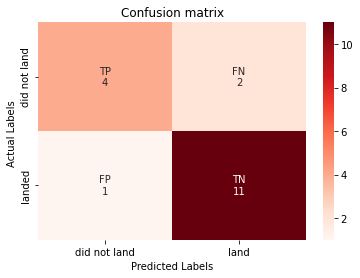

In [73]:
plot_confusion_matrix(y_test,yhat)

## 2. Support vector machine

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [74]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [75]:
grid_search = GridSearchCV(svm, parameters, cv=10)
svm_cv = grid_search.fit(X_train, y_train)

In [76]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 31.622776601683793, 'kernel': 'sigmoid'}
accuracy : 0.8767857142857144


In [77]:
#Accuracy Score
svm_cv.score(X_test, y_test)

0.6666666666666666

In [78]:
yhat=svm_cv.predict(X_test)
yhat[0:2]

array([0, 0], dtype=int64)

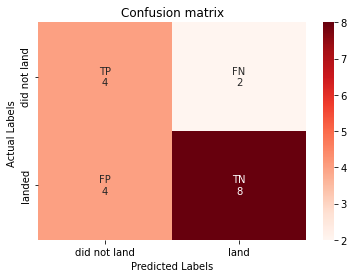

In [79]:
plot_confusion_matrix(y_test,yhat)

## 3. Decision tree classifier

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [83]:
grid_search = GridSearchCV(tree, parameters, cv=10)
tree_cv = grid_search.fit(X_train, y_train)

In [84]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8892857142857145


In [86]:
#Accuracy Score
tree_cv.score(X_test, y_test)

0.6111111111111112

In [87]:
yhat=tree_cv.predict(X_test)
yhat[0:2]

array([0, 0], dtype=int64)

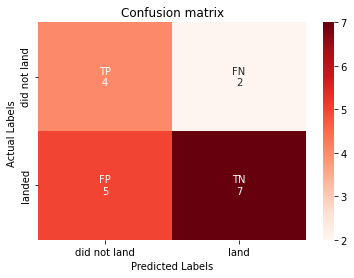

In [88]:
plot_confusion_matrix(y_test,yhat)

## 4. K-nearest neighnors

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [92]:
grid_search = GridSearchCV(KNN, parameters, cv=10)
knn_cv = grid_search.fit(X_train, y_train)

In [93]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8357142857142857


In [94]:
#Accuracy Score
knn_cv.score(X_test, y_test)

0.8333333333333334

In [95]:
yhat=tree_cv.predict(X_test)
yhat[0:2]

array([0, 0], dtype=int64)

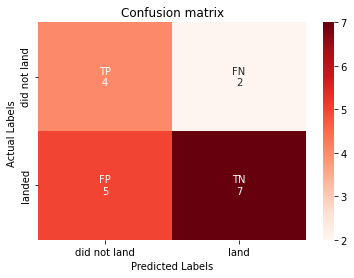

In [96]:
plot_confusion_matrix(y_test,yhat)

## Conclusion: KNN performance best 